In [0]:
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


# DSTEP20 // Assignment #2

# Teddy Katayama

assigned : **Jan 15, 2020**

DUE : **Jan 22, 2020 11:59pm**

## Are NYC congresspeople tweeting about New Yorker's concerns?

<img src="https://www.dailydot.com/wp-content/uploads/2019/01/twitter-on-capitol-hill.jpg" width=625>

---

### OVERVIEW

Social media use by congress is [booming](https://fas.org/sgp/crs/misc/R45337.pdf), with members using the platform to directly engage with their constiuents, take part in the national conversation around timely issues, and fundraise for (re)election.  Participation in social media discourse is quickly becoming [mandatory](https://fcw.com/articles/2018/08/08/social-media-congress.aspx) for public servants looking to both compete in the messaging game and solicit feedback from those who are affected by their policies.

At the same time, from the social science perspective, social media is frought with participation bias of all sorts and so it is not clear that the conversation on social media platforms tracks with the lived experience of the electorate.  In this assignment, you will be determining whether members of Congress representing New York City are using social media to highlight the common issues that New Yorkers are facing as measured by 311 service requests.

<u>**Instructions for tasks that will be graded are in bold below.**</u>

### PART 1 - Background

<b>
Provide a brief (no more than 500 words) descriptive overview of 

1. the use of social media by public servants and congress in particular, and

2. the rise of the 311 service in New York City including the reasons for its implementation, operational methods, and characteristics of the datasets available via NYC's Open Data Portal,

that can serve as the background for the results that you derive below.  As you lay out this Background for this assignment, an important characteristic to consider is bias (in a statistical as opposed to cultural sense).  For example:

- Who is using social media platforms?
- Who is calling into 311 in NYC?
- Is the scope of 311 a reasonable tracer of the issues facing citizens?
- What is divide between social media personality of a congressperson and their actual legislative agenda?

Please include *references* within the description via weblinks (like the "booming" link in the Overview in the cell above).
</b>

<img src="https://pbs.twimg.com/media/EOq18sUWkAA488l?format=jpg&name=medium" width="35%" align="left" hspace="1%">
In the past decade, the use of social media by public servants and congresspeople as a means for collecting and exchanging information continues to rise.  Not only do we see an increasing interest in using social media, the number of adopted platforms that members of congresss use is also growing.  In 2009, 39% of congress people had a Twitter account [ref](https://piperreport.com/blog/2013/04/15/congress-social-media-twitter-facebook-senators-congressmen/).  By 2012 75% of members of the House of Representatives and 67% of senators had both Twitter and Facebook account.  In 2018, 452 members of congress had adopted at least 5 social media platforms [ref](https://fas.org/sgp/crs/misc/R45337.pdf).  Use of social media as a vessel to communicate with citizens has responded with more citizens interacting with public servants as can bee seen with the rapid growth of avaialbe resources of the DoITT 3-1-1.  Civilians can inquire about resources from a large number of services such as Education, Employment, Filing Complaints, Health, Courts & Law, and many others; all interactable through social media via twitter [@nyc311](https://twitter.com/nyc311), online using their [online portal](https://portal.311.nyc.gov/), Video Relay Service with the number [212-NEW-YORK](https://www1.nyc.gov/site/buildings/renter/file-a-complaint.page), text message using the phone number [311-692](), or by phone call dialling the number [3-1-1](https://www1.nyc.gov/site/buildings/renter/file-a-complaint.page) if within New York City or [212-639-9675](https://www1.nyc.gov/site/buildings/renter/file-a-complaint.page) when outside the city.



### PART 2 - Accessing and Analyzing Congressional Tweets

You will be working with two datasets for this assignment.  The first is all of the tweets from every member of congress from 2019.  This file can be found in the folder dstep20/data/congress_tweets/congress_tweets_2019.tsv.  The second is the 311 service requests from NYC that we accessed in class and which can be found [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

**Load the congressional tweets data from Google Drive into a DataFrame called tweets.$^{\dagger}$**

<small> $^{\dagger}$ Hint, the data is a tab separated file and the tab character can be represented by the string "\t".  Also, be sure to specify the lineterminator to be the newline character "\n". </small>

In [0]:
import pandas as pd
import numpy as np
import requests
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My\ Drive/Data_Science/dstep20/data

/content/gdrive/My Drive/Data_Science/dstep20/data


In [0]:
tweets = pd.read_csv('congress_tweets/congress_tweets_2019.tsv', delimiter = '\t', lineterminator='\n')
display(tweets.head(2))

,date,tweet
0,2019-01-01,RepLipinski:Happy New Year! Wishing everyone a...
1,2019-01-01,RosLehtinen:Hurrah @NikkiHaley! I fought every...


**Split the tweet column into a screen name and the tweet text, and add those back to the oringinal tweets DataFrame with column names "screen_name" and "text".**

In [0]:
tweets['screen_name'] = tweets['tweet'].str.split(':', n = 1, expand=True)[0]
tweets['tweet_text']  = tweets['tweet'].str.split(':', n = 1, expand=True)[1]
display(tweets.head(5))

,date,tweet,screen_name,tweet_text
0,2019-01-01,RepLipinski:Happy New Year! Wishing everyone a...,RepLipinski,Happy New Year! Wishing everyone a healthy and...
1,2019-01-01,RosLehtinen:Hurrah @NikkiHaley! I fought every...,RosLehtinen,Hurrah @NikkiHaley! I fought every year to def...
2,2019-01-01,RepRubenGallego:I’ll be on @MSNBC shortly to d...,RepRubenGallego,I’ll be on @MSNBC shortly to discuss to latest...
3,2019-01-01,RepJohnYarmuth:Wishing you all a very happy he...,RepJohnYarmuth,Wishing you all a very happy healthy and produ...
4,2019-01-01,MarkWarner:Wishing everyone around the Commonw...,MarkWarner,Wishing everyone around the Commonwealth a hap...


The screen names for only congresspeople representing the citizens of NYC can be found in the file dstep20/data/congress_tweets/nyc_congress_screen_names.csv.

**Sub-select only those tweets coming from congresspeople representing NYC using the list of screen names from the congress_screen_names.csv file and the .isin method of the tweets DataFrame.  Call this new DataFrame (consisting only of tweets for NYC) nyc_tw.**

In [0]:
temp = pd.read_csv('congress_tweets/nyc_congress_screen_names.csv')
display(temp.head())

nyc_tw = tweets[tweets['screen_name'].isin(temp['screen_name'])]
display(nyc_tw.head())

,screen_name,name,party
0,SenSchumer,Chuck Schumer,D
1,chuckschumer,Chuck Schumer,D
2,SenGillibrand,Kirsten Gillibrand,D
3,gillibrandny,Kirsten Gillibrand,D
4,RepLeeZeldin,Lee Zeldin,R


,date,tweet,screen_name,tweet_text
35,2019-01-01,Grace4NY:My kids wrote a note to all the new #...,Grace4NY,My kids wrote a note to all the new #Congressk...
51,2019-01-01,RepTomSuozzi:The Northport VA should be a mode...,RepTomSuozzi,The Northport VA should be a model for our cou...
66,2019-01-01,RepEspaillat:You are cordially invited to join...,RepEspaillat,You are cordially invited to join us for the S...
129,2019-01-01,RepGregoryMeeks:Wishing everyone a happy new y...,RepGregoryMeeks,Wishing everyone a happy new year! http//pbs.t...
168,2019-01-01,RepYvetteClarke:The beginning of a new year sy...,RepYvetteClarke,The beginning of a new year symbolizes hope an...


**What is the total fraction of all congresspeople's tweets that are sent by congresspeople representing NYC?**

In [0]:
print("{0}% of all congresspeople's tweets were sent by congresspeople representing NYC.".format(round(100.0*len(nyc_tw)/len(tweets), 2)))

3.77% of all congresspeople's tweets were sent by congresspeople representing NYC.


**How does that fraction compare to the fraction of the US population that are New Yorkers (nyc)?**

In [0]:
import json
from bs4 import BeautifulSoup

# US Population
url = 'https://www.census.gov/popclock/data/population.php/us?date=20200116&_=1579286795563'
data = requests.get(url)
pop_usa = float(json.loads(data.text)['us']['population'])

# New York State Population
url = 'https://www.census.gov/quickfacts/fact/table/NY/PST045219'
data = requests.get(url)
soup = BeautifulSoup(data.text)
pop_ny = float(soup.find('td', attrs={'data-geoid': '36'}).attrs['data-value'])

# New York City Population
url = 'https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/PST045219'
data = requests.get(url)
soup = BeautifulSoup(data.text)
pop_nyc = float(soup.find_all('td', attrs={'data-geoid': '3651000'})[2].attrs['data-value'])

print('USA Population: {0}\nNYC Population: {1}'.format(pop_usa, pop_nyc))
print('\n{0}% of the US population are New Yorkers'.format(round((100.0*pop_nyc/pop_usa), 2)))

USA Population: 329184718.0
NYC Population: 8398748.0

2.55% of the US population are New Yorkers


With 2.55% of the US population being New Yorkers, a 3.77% of NYC congresspeople tweets shows that the NYC congresspoeple tweet slightly higher than the number of people with whom they represent.

**Make a bar plot (<u>including a descriptive caption</u>) of the total number of tweets for each screen name in nyc_tw in descending order.**

In [0]:
# OLD METHOD: Compute Frequency Count
from collections import Counter

freq = Counter(nyc_tw['screen_name']).most_common()
print(freq)
x, y = map(list, zip(*freq))
print(x)
print(y)

# EASIER: Compute Frequency Count
freq_nyc_tw = nyc_tw.groupby(['screen_name']).count()
sort_freq_nyc_tw = freq_nyc_tw.sort_values(['tweet_text'], ascending=False).drop(columns=['date', 'tweet'])
display(sort_freq_nyc_tw.head())

[('AOC', 3232), ('RepMaloney', 2764), ('RepEspaillat', 2533), ('NydiaVelazquez', 2372), ('CarolynBMaloney', 2363), ('SenSchumer', 2025), ('SenGillibrand', 1994), ('Grace4NY', 1875), ('ReElectNydia', 1397), ('RepGregoryMeeks', 1325), ('RepEliotEngel', 1088), ('RepLeeZeldin', 1036), ('RepJerryNadler', 932), ('RepYvetteClarke', 917), ('RepMaxRose', 822), ('MaxRose4NY', 789), ('RepKathleenRice', 767), ('RepGraceMeng', 623), ('RepJeffries', 559), ('gillibrandny', 531), ('RepJoseSerrano', 413), ('leezeldin', 406), ('RepTomSuozzi', 397), ('RepPeteKing', 358), ('RepAOC', 81), ('JerryNadler', 60), ('Tom_Suozzi', 23), ('KathleenRice', 17), ('TeamJeffries', 10), ('serranocongress', 7), ('congpeteking', 5), ('chuckschumer', 5), ('petekingcpg', 4), ('VoteYvette', 1)]
['AOC', 'RepMaloney', 'RepEspaillat', 'NydiaVelazquez', 'CarolynBMaloney', 'SenSchumer', 'SenGillibrand', 'Grace4NY', 'ReElectNydia', 'RepGregoryMeeks', 'RepEliotEngel', 'RepLeeZeldin', 'RepJerryNadler', 'RepYvetteClarke', 'RepMaxRose'

,tweet_text
screen_name,
AOC,3232
RepMaloney,2764
RepEspaillat,2533
NydiaVelazquez,2372
CarolynBMaloney,2363


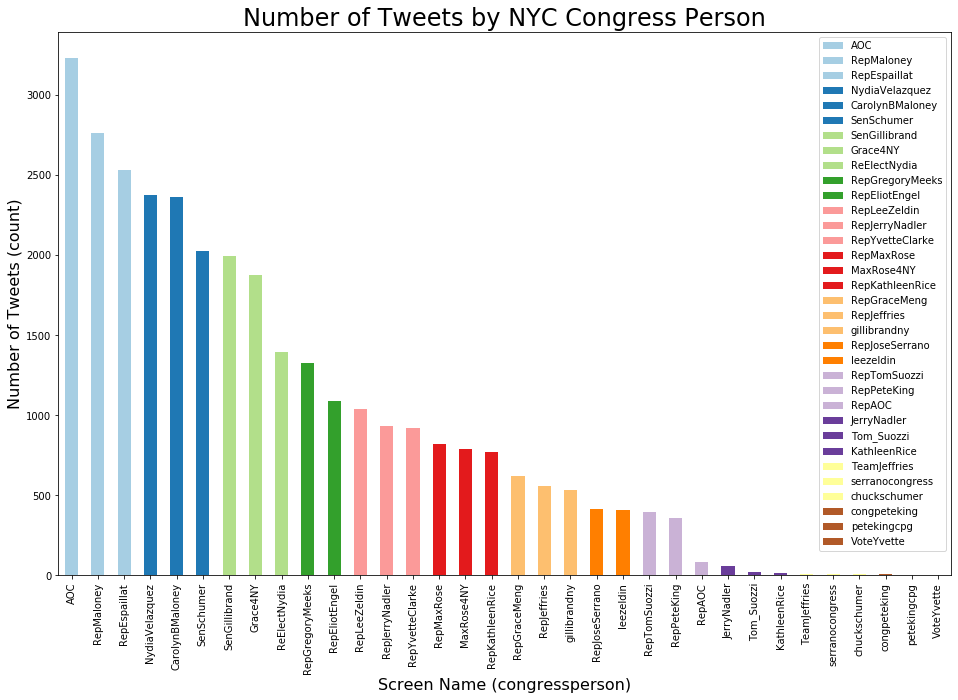

In [0]:
'''
ax = sort_freq_nyc_tw.plot(kind = 'bar', y = 'tweet_text', figsize = (14, 10))
ax.set_title('Number of Tweets by NYC Congress Person', fontsize = 24)
ax.legend()
ylab = ax.set_ylabel('Number of Tweets (count)', fontsize = 16)
xlab = ax.set_xlabel('Screen Name (congressperson)', fontsize = 16)
'''
# ColorMaps: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
tmp = sort_freq_nyc_tw['tweet_text']
temp = pd.DataFrame([{k: tmp[k]} for k in tmp.index], index = tmp.index)
ax = temp.plot(kind = 'bar', stacked = True, colormap = 'Paired', figsize = (16, 10))
ax.set_title('Number of Tweets by NYC Congress Person', fontsize = 24)
ax.legend()
ylab = ax.set_ylabel('Number of Tweets (count)', fontsize = 16)
xlab = ax.set_xlabel('Screen Name (congressperson)', fontsize = 16)
#ax.text(x = 0.5, y = 0, s = 'Figure 1.  A bar plot showing the total number of tweets in 2019 by NYC congressperson screen name.\n \
#                                AOC generated the most tweets with 3232.  More than half of NYC congresspeople generated over 500 tweets.')

# ax.tick_params(axis = 'x', labelrotation = -45.0)


Figure 1.  A bar plot showing the total number of tweets in 2019 by NYC congressperson screen name.  AOC generated the most tweets with 3232.  More than half of NYC congresspeople generated over 500 tweets.

Before we compare the content of the tweets with 311 Service Requests, let's practice by searching the NYC tweets for certain topical words/phrases that are current.

**What is the fraction of NYC tweets that contain the word "gun" or "guns"?**

In [0]:
nyc_tw_gun = nyc_tw[nyc_tw['tweet_text'].str.contains('gun|guns', regex = True)]
print("Of the {0} tweets from NYC congresspersons,\n {1} tweets contained the word 'gun' or 'guns' ({2}% of tweets).".format(len(nyc_tw), len(nyc_tw_gun), round((100.0*(len(nyc_tw_gun))/len(nyc_tw)), 2)))

Of the 31731 tweets from NYC congresspersons,
 957 tweets contained the word 'gun' or 'guns' (3.02% of tweets).


**What fraction of the NYC tweets contain the phrase "medicare for all"?**

In [0]:
nyc_tw_med = nyc_tw[nyc_tw['tweet_text'].str.lower().str.contains('medicare for all|#medicareforall', regex = True)]['tweet_text']
print("Of the {0} tweets from NYC congresspersons,\n {1} tweets contained the phrase 'medicare for all' or were tagged '#MedicareForAll' ({2}% of tweets).".format(len(nyc_tw), len(nyc_tw_med), round((100.0*(len(nyc_tw_med))/len(nyc_tw)), 2)))

Of the 31731 tweets from NYC congresspersons,
 116 tweets contained the phrase 'medicare for all' or were tagged '#MedicareForAll' (0.37% of tweets).


**What fraction of the NYC tweets tag the President of the US's official twitter account?**

In [0]:
nyc_tw_potus = nyc_tw[nyc_tw['tweet_text'].str.contains('@POTUS|@realDonaldTrump', regex = True)]['tweet_text']
print("Of the {0} tweets from NYC congresspersons,\n {1} tweets tag the President of the US\'s twitter account' ({2}% of tweets).".format(len(nyc_tw), len(nyc_tw_potus), round((100.0*(len(nyc_tw_potus))/len(nyc_tw)), 2)))

Of the 31731 tweets from NYC congresspersons,
 1439 tweets tag the President of the US's twitter account' (4.53% of tweets).


### PART 3 - Accessing 311 Service Request Data


<b>Use the sodapy module to load the 311 service requests for NYC from Jan 1st, 2019 to Jan 1st 2020 into a DataFrame.  The solution should include: 

- use pip to install sodapy

- set the query return limit to 10000000 (to make sure you get them all)

- set the query to return only the unique_key, created_date, and complaint_type columns

- set an appropriate connection timeout

- name the DataFrame nyc_311

</b>

In [0]:
!pip install sodapy pycryptodome

In [0]:
cd /content/gdrive/My\ Drive/Data_Science/Assignments

/content/gdrive/My Drive/Data_Science/Assignments


In [0]:
import base64
import urllib
import pandas as pd
import numpy as np
from Crypto.Cipher import AES
from sodapy import Socrata

# read encrypted api key
with open('soda_token.key', 'rb') as f:
    raw = base64.b64decode(f.read())
key = raw[:32]
nonce = raw[32:48]
ciphertext = raw[48:]

# decrypt key
cipher = AES.new(key, AES.MODE_EAX, nonce)
app_token = cipher.decrypt(ciphertext).decode()

# connect using decrypted app token
client = Socrata("data.cityofnewyork.us", app_token=app_token, timeout=120)


In [0]:
results = client.get('erm2-nwe9',
                     # query = 'SELECT unique_key, created_date, complaint_type WHERE created_date > "2018-03-26T17:20:00.000" LIMIT 100'
                     select = 'unique_key, created_date, complaint_type', 
                     # where = 'created_date between "2019-01-01T00:00:00.000" and "2020-01-01T00:00:00.000"',
                     where = 'created_date between "2019-01-01T00:00:00.000" and "2019-12-31T23:59:59.999" AND agency != "DVS"',
                     limit = 10000000)
nyc_311 = pd.DataFrame.from_records(results)
display(nyc_311)

,unique_key,created_date,complaint_type
0,41309122,2019-01-01T00:00:00.000,Rodent
1,41310910,2019-01-01T00:00:00.000,Rodent
2,41314898,2019-01-01T00:00:00.000,Rodent
3,41315045,2019-01-01T00:00:00.000,Rodent
4,41315071,2019-01-01T00:00:00.000,Rodent
...,...,...,...
2456691,45282332,2019-12-31T23:56:52.000,Blocked Driveway
2456692,45278249,2019-12-31T23:57:19.000,Noise - Residential
2456693,45283574,2019-12-31T23:58:03.000,Noise - Residential
2456694,45281589,2019-12-31T23:58:54.000,Noise - Residential


**How many NaN's are there in each column?**

In [0]:
print(nyc_311.isna().sum(axis=0))

print("\nThey're are 0 NaN's in each column")

unique_key        0
created_date      0
complaint_type    0
dtype: int64

They're are 0 NaN's in each column


**What are the unique values of complaint type?**

In [0]:
print(nyc_311['complaint_type'].unique())

['Rodent' 'Unsanitary Pigeon Condition' 'Unsanitary Animal Pvt Property'
 'Food Poisoning' 'DOOR/WINDOW' 'Noise - Residential'
 'For Hire Vehicle Report' 'Blocked Driveway' 'Street Condition'
 'Noise - Commercial' 'Hazardous Materials' 'Illegal Parking'
 'Traffic Signal Condition' 'Request Large Bulky Item Collection' 'Sewer'
 'Noise - Street/Sidewalk' 'Taxi Complaint' 'Noise' 'HEAT/HOT WATER'
 'UNSANITARY CONDITION' 'Building/Use' 'ELECTRIC' 'Illegal Fireworks'
 'WATER LEAK' 'Curb Condition' 'Derelict Vehicle' 'Animal Abuse'
 'Noise - Vehicle' 'SAFETY' 'Sanitation Condition' 'Air Quality'
 'Food Establishment' 'New Tree Request' 'Street Light Condition'
 'Benefit Card Replacement' 'DCA / DOH New License Application Request'
 'PAINT/PLASTER' 'DPR Internal' 'Homeless Person Assistance'
 'HPD Literature Request' 'ELEVATOR' 'Non-Emergency Police Matter'
 'Other Enforcement' 'Drinking' 'GENERAL' 'For Hire Vehicle Complaint'
 'Graffiti' 'Unleashed Dog' 'Bus Stop Shelter Placement' 'Drug Act

In [0]:
'''
results = client.get('erm2-nwe9', where = 'created_date between "2019-01-01T00:00:00.000" and "2019-12-31T23:59:59.999" AND agency = "DVS"')
df = pd.DataFrame.from_records(results)
display(df.head(2))
'''

'\nresults = client.get(\'erm2-nwe9\', where = \'created_date between "2019-01-01T00:00:00.000" and "2019-12-31T23:59:59.999" AND agency = "DVS"\')\ndf = pd.DataFrame.from_records(results)\ndisplay(df.head(2))\n'

**Make a bar plot (<u>including a descriptive caption</u>) of the top 10 most common complaint types in the 2019 NYC 311 data in descending order left to right.**

In [0]:
# EASIER: Compute Frequency Count
freq_nyc_311 = nyc_311.groupby(['complaint_type']).count()
top_10_nyc_311 = freq_nyc_311.sort_values(['unique_key'], ascending=False).drop(columns=['created_date'])[0:10]
display(top_10_nyc_311)

,unique_key
complaint_type,
Noise - Residential,232861
HEAT/HOT WATER,212075
Illegal Parking,198360
Blocked Driveway,137738
Request Large Bulky Item Collection,99538
Noise - Street/Sidewalk,97922
Street Condition,88304
Street Light Condition,68211
Water System,63462


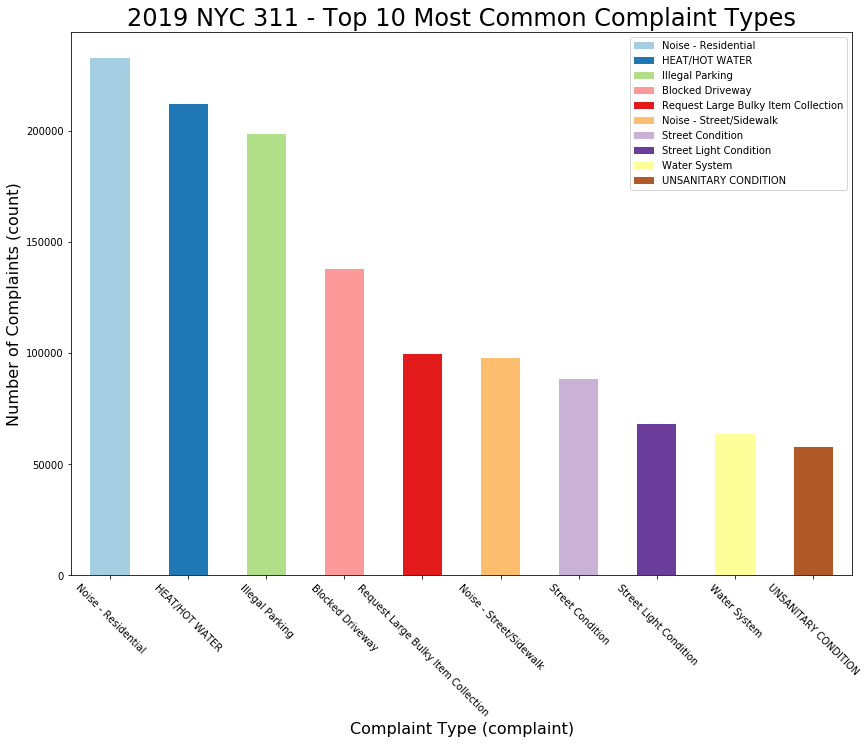

In [0]:
# ColorMaps: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

tmp = top_10_nyc_311['unique_key']
temp = pd.DataFrame([{k: tmp[k]} for k in tmp.index], index = tmp.index)
ax = temp.plot(kind = 'bar', stacked = True, colormap = 'Paired', figsize = (14, 10))
ax.set_title('2019 NYC 311 - Top 10 Most Common Complaint Types', fontsize = 24)
ax.legend()
ylab = ax.set_ylabel('Number of Complaints (count)', fontsize = 16)
xlab = ax.set_xlabel('Complaint Type (complaint)', fontsize = 16)
ax.tick_params(axis = 'x', labelrotation = -45.0)

### PART 4 - Combining Congressional Tweets and 311 Service Request Analyses



<b>Combine the methodology for searching NYC congressional tweets that you developed in Part 2 with the 311 Service Request data that you have explored in Part 3 to address the question of whether congresspeople representing NYC are using social media as a platform to highlight these issues.

This part of the assignment is purposefully open-ended as there are numerous ways to address the question.  For whatever evidence that you provide, describe the assumptions and approximations as well as potential biases or missing perspectives that might impact your conclusions.</b>

In [0]:
nyc_311_complaints = nyc_311['complaint_type'].unique()
complaints = ['Animal Abuse']

for complaint in nyc_311_complaints[0:]:
  complaint = complaint.strip()
  # if 'DOOR/WINDOW' not in complaint and 'Building/Use' not in complaint and 'Plant' not in complaint and 'Lead' not in complaint:
  if len(complaint.split()) > 1 and complaint not in ['Rodent', 'Sewer', 'Noise', 'ELECTRIC', 'SAFETY', 'ELEVATOR', 'Drinking', 'Graffiti', 'PLUMBING', 'Elevator', 'Plumbing', 'Smoking', 'Asbestos', 'APPLIANCE', 'Boilers', 'Traffic', 'Electrical', 'SCRIE', 'Mold', 'FATF', 'DRIE', 'Facades', 'Panhandling', 'LinkNYC', 'Snow', 'Lifeguard', 'Tattooing', 'Advocate-SCRIE/DRIE', 'Advocate-Foreclosure', 'Safety', 'Squeegee', 'SRDE', 'Mosquitoes', 'Tanning', 'Appliance', 'Adopt-A-Basket', 'MSOTHER', 'Electric', 'Construction', 'Sweeping/Missed-Inadequate']:
    line = ''
    if '-' in complaint and '/' in complaint:
      line = ' '.join(complaint.split('-')[::-1]).strip()
      line1 = line.split('/')[0].split()[0] + ' ' + line.split()[1]
      line2 = line.split('/')[1].split()[0] + ' ' + line.split()[1]      
      complaints.append(line1.strip().split('/')[0])
      complaints.append(line2.strip().split('/')[0])      
    elif '-' in complaint:
      line = ' '.join(complaint.split('-')[::-1]).strip()
      complaints.append(line.strip())      
    elif '/' in complaint:
      line1 = ''
      line2 = ''
      line3 = ''
      temp = complaint.replace(' / ', '/').split()
      for tmp in temp:
        if '/' in tmp:
          left = tmp.split('/')[0]
          right = tmp.split('/')[1]
          line1 += left + ' '
          line2 += right + ' '
          if temp.count('/') > 2:
            line3 += tmp.split('/')[2]
        else:
          line1 += tmp + ' '
          line2 += tmp + ' '
          if temp.count('/') > 2:        
            line3 += tmp + ' '
      complaints.append(line1.strip())
      complaints.append(line2.strip())
      if temp.count('/') > 2:
        complaints.append(line3.strip())
    if complaint.count('-') == 0 and complaint.count('/') == 0:
      line = complaint
      complaints.append(line.strip())

print('| ', end = '')
for i, complaint in enumerate(complaints):
  print(complaint, end = ' | ')
  if (i + 1) % 8 == 0:
    print('\n', end = '| ')

| Animal Abuse | Unsanitary Pigeon Condition | Unsanitary Animal Pvt Property | Food Poisoning | Residential Noise | For Hire Vehicle Report | Blocked Driveway | Street Condition | 
| Commercial Noise | Hazardous Materials | Illegal Parking | Traffic Signal Condition | Request Large Bulky Item Collection | Street Noise | Sidewalk Noise | Taxi Complaint | 
| HEAT WATER | HOT WATER | UNSANITARY CONDITION | Illegal Fireworks | WATER LEAK | Curb Condition | Derelict Vehicle | Animal Abuse | 
| Vehicle Noise | Sanitation Condition | Air Quality | Food Establishment | New Tree Request | Street Light Condition | Benefit Card Replacement | DCA New License Application Request | 
| DOH New License Application Request | DPR Internal | Homeless Person Assistance | HPD Literature Request | Emergency Police Matter Non | Other Enforcement | For Hire Vehicle Complaint | Unleashed Dog | 
| Bus Stop Shelter Placement | Drug Activity | Taxi Report | Overflowing Litter Baskets | Litter Basket | Litter Req

In [0]:
terms = '|'.join(complaints).lower()
terms

"animal abuse|unsanitary pigeon condition|unsanitary animal pvt property|food poisoning|residential noise|for hire vehicle report|blocked driveway|street condition|commercial noise|hazardous materials|illegal parking|traffic signal condition|request large bulky item collection|street noise|sidewalk noise|taxi complaint|heat water|hot water|unsanitary condition|illegal fireworks|water leak|curb condition|derelict vehicle|animal abuse|vehicle noise|sanitation condition|air quality|food establishment|new tree request|street light condition|benefit card replacement|dca new license application request|doh new license application request|dpr internal|homeless person assistance|hpd literature request|emergency police matter non|other enforcement|for hire vehicle complaint|unleashed dog|bus stop shelter placement|drug activity|taxi report|overflowing litter baskets|litter basket|litter request|electronics waste appointment|dead tree|dying tree|derelict vehicles|water system|dirty conditions|ge

In [0]:
nyc_tw_311_complaints =  nyc_tw[nyc_tw['tweet_text'].str.lower().str.contains(terms, regex=True)]['tweet_text']
print("Of the {0} tweets from NYC congresspersons,\n {1} tweets likely addressed a '311 complaint' ({2}% of tweets).".format(len(nyc_tw), len(nyc_tw_311_complaints), round((100.0*(len(nyc_tw_311_complaints))/len(nyc_tw)), 2)))

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Of the 31731 tweets from NYC congresspersons,
 103 tweets likely addressed a '311 complaint' (0.32% of tweets).


### EXTRA CREDIT - the case of another city

The raw data for the congressional tweets can be found [here](https://github.com/alexlitel/congresstweets) and [here](https://github.com/alexlitel/congresstweets/tree/master/data).

**Repeat the analysis in this notebook for <u>another</u> US city of your choosing for the <u>year 2018</u>.**







## Get Data

> I grew up in the Hampton Roads area so I am selecting the cities in my area (Virginia Beach, Norfolk, Hampton, Chesapeake, Newport News, Portsmouth, Suffolk, Williamsburg, and Poquoson).  Hampton Roads spans over the $2^{nd}$, $3^{rd}$, and $4^{th}$ Districts.

In [0]:
cd /content/gdrive/My\ Drive/Data_Science/Assignments

/content/gdrive/My Drive/Data_Science/Assignments


In [0]:
import json

### Hampton Roads Congresspeople 
# https://www.govtrack.us/congress/members/VA#representatives
# https://resist.blog/us-house-representatives-twitter-list/
# https://triagecancer.org/congressional-twitter-handles
temp = pd.read_csv('hr_congress_screen_names.csv')
display(temp)

,screen_name,name,party
0,MarkWarner,Mark Warner,D
1,SenatorWarner,Mark Warner,D
2,timkaine,Timothy Kaine,D
3,SenatorKaine,Timothy Kaine,D
4,RepElaineLuria,Elaine Luria,D
5,ElaineLuriaVA,Elaine Luria,D
6,repbobbyscott,Robert Scott,D
7,BobbyScott,Robert Scott,D
8,RepMcEachin,Donald McEachin,D
9,Donald_McEachin,Donald McEachin,D


In [0]:
# Fetch All Tweet Data
!git clone https://github.com/alexlitel/congresstweets.git

fatal: destination path 'congresstweets' already exists and is not an empty directory.


In [0]:
cd congresstweets/data

/content/gdrive/My Drive/Data_Science/Assignments/congresstweets/data


In [0]:
## Load Congressional Data
files = !find . -iname '2018*'

tweets = pd.read_json(files[0])
for fname in files[1:]:
  with open(fname) as f:
    tweets = tweets.append(json.load(f), ignore_index = True, sort=False)
display(tweets.head(2))
display(tweets.tail(2))

,id,screen_name,user_id,time,link,text,source,yesterday,today
0,947696191856349184,RepGaramendi,88806753,2018-01-01T00:09:14-05:00,https://www.twitter.com/RepGaramendi/statuses/...,"@roglemasroger3 Happy new year to you, Roger! ...",Twitter for iPhone,NaN,NaN
1,947696148503977984,RepBillFlores,237312687,2018-01-01T00:09:03-05:00,https://www.twitter.com/VP/statuses/9475659449...,RT @VP Saddened to learn of the senseless viol...,Twitter for iPhone,NaN,NaN


,id,screen_name,user_id,time,link,text,source,yesterday,today
737406,1079913189289218048,PramilaJayapal,193441812,2018-12-31T20:32:22-05:00,https://www.twitter.com/PramilaJayapal/statuse...,Happy New Year's Eve from my family to yours. ...,Twitter for Android,NaN,NaN
737407,1079788609295781893,RepBera,950783972,2018-12-31T12:17:20-05:00,https://www.twitter.com/RepBera/statuses/10797...,Are you a veteran in Sacramento County who nee...,Twitter Web Client,NaN,NaN


## Explore Data

In [0]:
hr_tw = tweets[tweets['screen_name'].isin(temp['screen_name'])]
display(hr_tw.head())

,id,screen_name,user_id,time,link,text,source,yesterday,today
389,947899501045534720,MarkWarner,7429102,2018-01-01T13:37:06-05:00,https://www.twitter.com/MarkWarner/statuses/94...,Wishing everyone in the Commonwealth a happy n...,Twitter for iPhone,NaN,NaN
414,947892020328255488,timkaine,172858784,2018-01-01T13:07:23-05:00,https://www.twitter.com/timkaine/statuses/9478...,Big step US could take to support democracy mo...,Twitter for iPhone,NaN,NaN
808,948403735591604229,timkaine,172858784,2018-01-02T23:00:45-05:00,https://www.twitter.com/timkaine/statuses/9484...,These childish attacks raise the risk of stumb...,Twitter for iPhone,NaN,NaN
886,948287101623300098,MarkWarner,7429102,2018-01-02T15:17:18-05:00,https://www.twitter.com/MarkWarner/statuses/94...,It’s 2018. Congress needs to stop kicking the ...,Twitter Web Client,NaN,NaN
1338,948354647110160384,timkaine,172858784,2018-01-02T19:45:42-05:00,https://www.twitter.com/PoliticsK12/statuses/9...,RT @PoliticsK12 .@SenatorBaldwin @BillCassidy ...,Twitter for iPhone,NaN,NaN


**What is the total fraction of all congresspeople's tweets that are sent by congresspeople representing NYC?**

In [0]:
print("{0}% of all congresspeople's tweets were sent by congresspeople representing Hampton Roads".format(round(100.0*len(hr_tw)/len(tweets), 2)))

0.7% of all congresspeople's tweets were sent by congresspeople representing Hampton Roads


**How does that fraction compare to the fraction of the US population that are New Yorkers (nyc)?**

In [0]:
import json
from bs4 import BeautifulSoup

# US Population
url = 'https://www.census.gov/popclock/data/population.php/us?date=20200116&_=1579286795563'
data = requests.get(url)
pop_usa = float(json.loads(data.text)['us']['population'])

# Hampton Roads Population
url = 'https://www.census.gov/quickfacts/fact/table/portsmouthcityvirginia,chesapeakecityvirginia,newportnewscityvirginia,hamptoncityvirginia,virginiabeachcityvirginia,norfolkcityvirginia/PST045219'
data = requests.get(url)
soup = BeautifulSoup(data.text)
pop_hr = 0.0
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5116000'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5156000'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5135000'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5182000'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5157000'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5164000'})[2].attrs['data-value'])
url = 'https://www.census.gov/quickfacts/fact/table/poquosoncityvirginia,williamsburgcityvirginia,suffolkcityvirginia/PST045219'
data = requests.get(url)
soup = BeautifulSoup(data.text)
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5163768'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5186160'})[2].attrs['data-value'])
pop_hr += float(soup.find_all('td', attrs={'data-geoid': '5176432'})[2].attrs['data-value'])

print('US Population: {0}\nHR Population: {1}'.format(pop_usa, pop_hr))
print('\n{0}% of the US population are from Hampton Roads'.format(round((100.0*pop_hr/pop_usa), 2)))

US Population: 329184718.0
HR Population: 1462741.0

0.44% of the US population are from Hampton Roads


**Make a bar plot (<u>including a descriptive caption</u>) of the total number of tweets for each screen name in hr_tw in descending order.**

In [0]:
# Compute Frequency Count
freq_hr_tw = hr_tw.groupby(['screen_name']).count()
sort_freq_hr_tw = freq_hr_tw.sort_values(['text'], ascending=False).drop(columns=['id', 'user_id', 'time', 'link', 'source',
       'yesterday', 'today'])
display(sort_freq_hr_tw.head())

,text
screen_name,
MarkWarner,1835
RepMcEachin,1459
BobbyScott,853
timkaine,737
Donald_McEachin,243


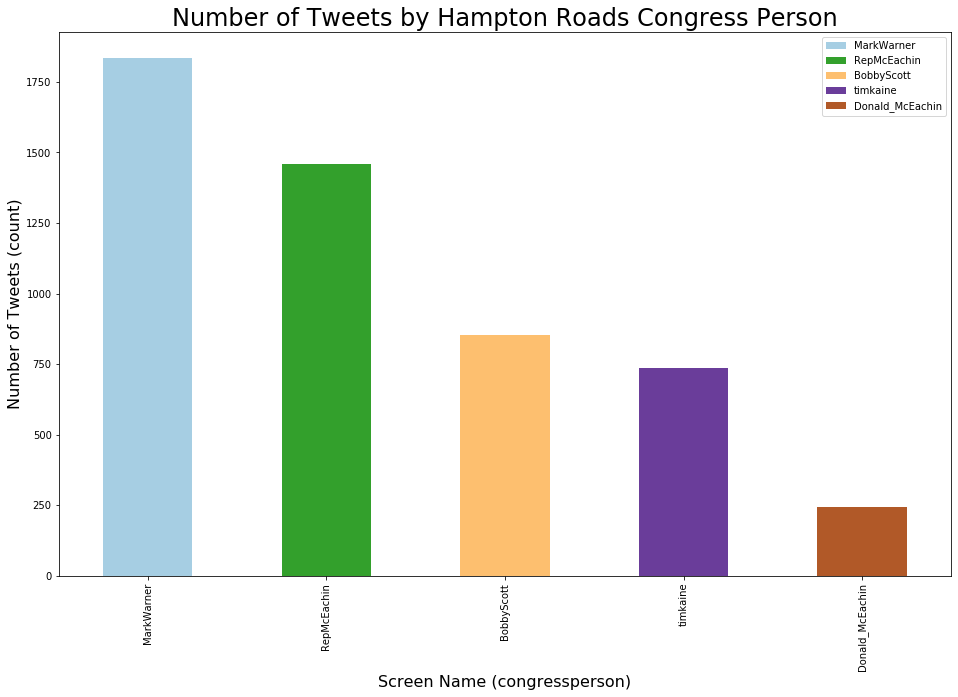

In [0]:
# ColorMaps: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
tmp = sort_freq_hr_tw['text']
temp = pd.DataFrame([{k: tmp[k]} for k in tmp.index], index = tmp.index)
ax = temp.plot(kind = 'bar', stacked = True, colormap = 'Paired', figsize = (16, 10))
ax.set_title('Number of Tweets by Hampton Roads Congress Person', fontsize = 24)
ax.legend()
ylab = ax.set_ylabel('Number of Tweets (count)', fontsize = 16)
xlab = ax.set_xlabel('Screen Name (congressperson)', fontsize = 16)

**What is the fraction of NYC tweets that contain the word "gun" or "guns"?**

In [0]:
hr_tw_gun = hr_tw[hr_tw['text'].str.lower().str.contains('gun|guns', regex = True)]
print("Of the {0} tweets from Hampton Roads congresspersons,\n {1} tweets contained the word 'gun' or 'guns' ({2}% of tweets).".format(len(hr_tw), len(hr_tw_gun), round((100.0*(len(hr_tw_gun))/len(hr_tw)), 2)))

Of the 5127 tweets from Hampton Roads congresspersons,
 99 tweets contained the word 'gun' or 'guns' (1.93% of tweets).


**What fraction of the NYC tweets contain the phrase "medicare for all"?**

In [0]:
hr_tw_med = hr_tw[hr_tw['text'].str.lower().str.contains('medicare for all|#medicareforall', regex = True)]
print("Of the {0} tweets from Hampton Roads congresspersons,\n {1} tweets contained the phrase 'medicare for all' or were tagged '#MedicareForAll' ({2}% of tweets).".format(len(hr_tw), len(hr_tw_med), round((100.0*(len(hr_tw_med))/len(hr_tw)), 2)))

Of the 5127 tweets from Hampton Roads congresspersons,
 1 tweets contained the phrase 'medicare for all' or were tagged '#MedicareForAll' (0.02% of tweets).


**What fraction of the NYC tweets tag the President of the US's official twitter account?**

In [0]:
hr_tw_potus = hr_tw[hr_tw['text'].str.contains('#POTUS', regex = False)]
print("Of the {0} tweets from Hampton Roads congresspersons,\n {1} tweets were tagged'#POTUS' ({2}% of tweets).".format(len(hr_tw), len(hr_tw_potus), round((100.0*(len(hr_tw_potus))/len(hr_tw)), 2)))

Of the 5127 tweets from Hampton Roads congresspersons,
 0 tweets were tagged'#POTUS' (0.0% of tweets).


## Service Request Data

> Finding publicly available service request data for hampton roads is challenging.  I found data for Norfolk, so I am making the assumption that the requests made in Norfolk are likely similar to requests made in the rest of the Hampton Roads Region.  

In [0]:
cd /content/gdrive/My\ Drive/Data_Science/Assignments

/content/gdrive/My Drive/Data_Science/Assignments


In [0]:
import base64
import urllib
import pandas as pd
import numpy as np
from Crypto.Cipher import AES
from sodapy import Socrata

# Get data from API
# https://data.norfolk.gov/Government/Norfolk-Cares-Data-Lens/q5yj-nphc
# https://dev.socrata.com/foundry/data.norfolk.gov/p5hy-7rkp

# read encrypted api key
with open('soda_token.key', 'rb') as f:
    raw = base64.b64decode(f.read())
key = raw[:32]
nonce = raw[32:48]
ciphertext = raw[48:]

# decrypt key
cipher = AES.new(key, AES.MODE_EAX, nonce)
app_token = cipher.decrypt(ciphertext).decode()

# connect using decrypted app token
client = Socrata("data.norfolk.gov", app_token=app_token, timeout=120)

results = client.get("p5hy-7rkp",
                     select = 'ticket_id, ticket_created_date_time, issue_description', 
                     where = 'ticket_created_date_time between "2018-01-01T00:00:00.000" and "2018-12-31T23:59:59.999"',
                     limit = 10000000)
hr_311 = pd.DataFrame.from_records(results)
display(hr_311)

,ticket_id,ticket_created_date_time,issue_description
0,525201,2018-01-02T05:20:55.000,(DSWEP) STREET SWEEPING
1,525202,2018-01-02T05:27:23.000,MISSED REGULAR TRASH
2,525203,2018-01-02T05:29:47.000,REXEMPT MISSED TRASH COLLECTION
3,525204,2018-01-02T05:32:21.000,MISSED REGULAR TRASH
4,525205,2018-01-02T05:35:21.000,MISSED REGULAR TRASH
...,...,...,...
39837,644918,2018-12-28T18:26:30.000,(APOTH) POTHOLE REPAIR
39838,644919,2018-12-28T18:43:30.000,LIGHTS NOT OPERATING
39839,644920,2018-12-31T08:32:20.000,(HOUSING/STRUCTURES) FIRE RED TAG
39840,644921,2018-12-31T08:33:37.000,(HOUSING/STRUCTURES) FIRE RED TAG


**How many NaN's are there in each column?**

In [0]:
print(hr_311.isna().sum(axis=0))

print("\nThey're are 0 NaN's in each column")

ticket_id                   0
ticket_created_date_time    0
issue_description           0
dtype: int64

They're are 0 NaN's in each column


**What are the unique values of complaint type?**

In [0]:
print(hr_311['issue_description'].unique())

['(DSWEP) STREET SWEEPING' 'MISSED REGULAR TRASH'
 'REXEMPT MISSED TRASH COLLECTION'
 '(HOUSING/STRUCTURES) EMERGENCY AFTER HOURS'
 '(HOUSING/STRUCTURES) FIRE RED TAG'
 'CANS OUT AT STREET ON NON COLLECTION DAY'
 '(HOUSING/STRUCTURES) INTERIOR' 'FIRE PLACARD'
 'CANS OUT IN THE FRONT YARD' 'UNSCHEDULED BULK WASTE COLLECTION AT CURB'
 '(NUISANCE) VACANT & OPEN' 'MISSED MISC PICK UP' 'MONTHLY PASS INQUIRY'
 'ABUSE' 'MISSED YARD WASTE PICK UP' 'ILLEGAL DUMPING AT CURB'
 '(HOUSING/STRUCTURES) EXTERIOR' 'ABANDONED VEHICLE (ON STREET)'
 '(NUISANCE) TRASH & DEBRIS' 'WEBSITE COMMENTS'
 'APPEAL OR CONTEST A TICKET INQUIRY'
 '(NUISANCE) ILLEGAL PARKING IN YARD (2+ OFFENSES)'
 'MALFUNCTIONING METERS' 'CITY TREE PRUNING/REMOVAL' 'SNOW AT BUS STOP'
 'PARKING ENFORCEMENT ON STREET REQUEST' 'DEAD ANIMAL REMOVAL'
 'SINKHOLES/CAVE-INS' 'ITEMS BLOCKING SIDEWALK' 'YARD WASTE BAGS AT CURB'
 'MISSED RECYCLING' 'OVERFLOWING TRASH CANS' 'MISHANDLING OF COLLECTION'
 '1/2 DUMPED 90 GALLON' 'CITY TREE/LIMB DOWN 

**Make a bar plot (<u>including a descriptive caption</u>) of the top 10 most common complaint types in the 2018 HR 311 data in descending order left to right.**

In [0]:
freq_hr_311 = hr_311.groupby(['issue_description']).count()
top_10_hr_311 = freq_hr_311.sort_values(['ticket_id'], ascending=False).drop(columns=['ticket_created_date_time'])[0:10]
print(top_10_hr_311)

                                           ticket_id
issue_description                                   
MISSED REGULAR TRASH                            4997
MISSED YARD WASTE PICK UP                       3116
TALL WEEDS AND GRASS                            2419
(APOTH) POTHOLE REPAIR                          2077
MISSED RECYCLING                                1398
ABANDONED VEHICLE (ON STREET)                   1350
ILLEGAL DUMPING AT CURB                         1202
LIGHTS NOT OPERATING                            1140
UNSCHEDULED BULK WASTE COLLECTION AT CURB       1122
CITY TREE PRUNING/REMOVAL                       1029


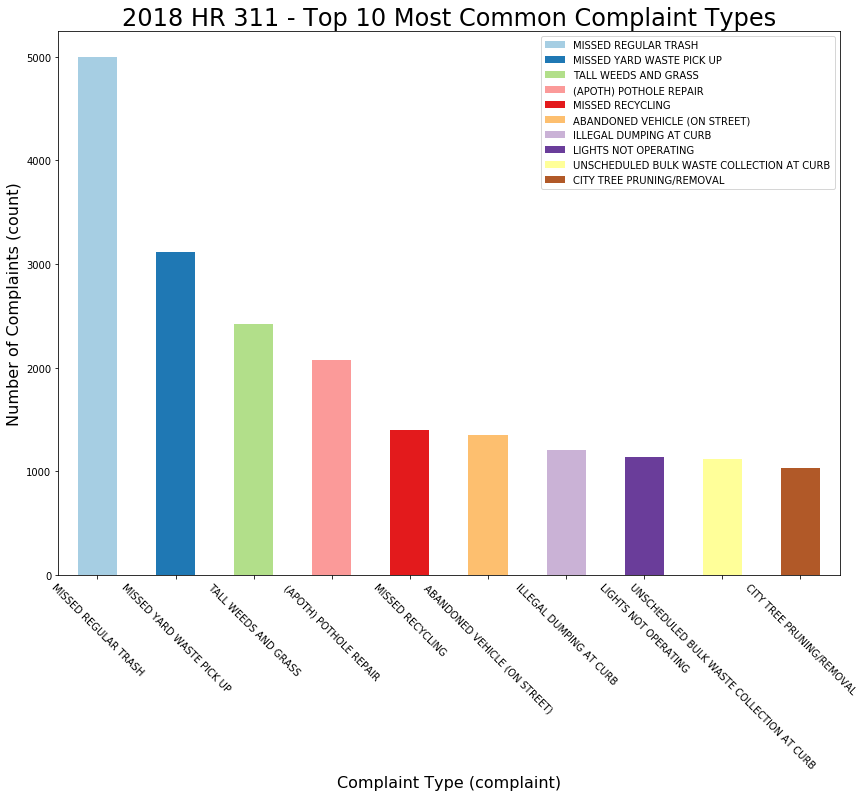

In [0]:
# ColorMaps: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

tmp = top_10_hr_311['ticket_id']
temp = pd.DataFrame([{k: tmp[k]} for k in tmp.index], index = tmp.index)
ax = temp.plot(kind = 'bar', stacked = True, colormap = 'Paired', figsize = (14, 10))
ax.set_title('2018 HR 311 - Top 10 Most Common Complaint Types', fontsize = 24)
ax.legend()
ylab = ax.set_ylabel('Number of Complaints (count)', fontsize = 16)
xlab = ax.set_xlabel('Complaint Type (complaint)', fontsize = 16)
ax.tick_params(axis = 'x', labelrotation = -45.0)

## Combining Congressional Tweets and 311 Service Request Analyses

In [0]:
terms = '|'.join(hr_311['issue_description'].unique())
terms

'(DSWEP) STREET SWEEPING|MISSED REGULAR TRASH|REXEMPT MISSED TRASH COLLECTION|(HOUSING/STRUCTURES) EMERGENCY AFTER HOURS|(HOUSING/STRUCTURES) FIRE RED TAG|CANS OUT AT STREET ON NON COLLECTION DAY|(HOUSING/STRUCTURES) INTERIOR|FIRE PLACARD|CANS OUT IN THE FRONT YARD|UNSCHEDULED BULK WASTE COLLECTION AT CURB|(NUISANCE) VACANT & OPEN|MISSED MISC PICK UP|MONTHLY PASS INQUIRY|ABUSE|MISSED YARD WASTE PICK UP|ILLEGAL DUMPING AT CURB|(HOUSING/STRUCTURES) EXTERIOR|ABANDONED VEHICLE (ON STREET)|(NUISANCE) TRASH & DEBRIS|WEBSITE COMMENTS|APPEAL OR CONTEST A TICKET INQUIRY|(NUISANCE) ILLEGAL PARKING IN YARD (2+ OFFENSES)|MALFUNCTIONING METERS|CITY TREE PRUNING/REMOVAL|SNOW AT BUS STOP|PARKING ENFORCEMENT ON STREET REQUEST|DEAD ANIMAL REMOVAL|SINKHOLES/CAVE-INS|ITEMS BLOCKING SIDEWALK|YARD WASTE BAGS AT CURB|MISSED RECYCLING|OVERFLOWING TRASH CANS|MISHANDLING OF COLLECTION|1/2 DUMPED 90 GALLON|CITY TREE/LIMB DOWN NOT BLOCKING STREET|(NUISANCE) INOPERABLE VEHICLE|(ASIDE) SIDEWALK REPAIR|(AROAD) ROAD

In [0]:
hr_tw_311_complaints =  hr_tw[hr_tw['text'].str.upper().str.contains(terms, regex=True)]['text']
print("Of the {0} tweets from Hampton Roads congresspersons,\n {1} tweets likely addressed a '311 complaint' ({2}% of tweets).".format(len(hr_tw), len(hr_tw_311_complaints), round((100.0*(len(hr_tw_311_complaints))/len(hr_tw)), 2)))

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Of the 5127 tweets from Hampton Roads congresspersons,
 278 tweets likely addressed a '311 complaint' (5.42% of tweets).


In [0]:
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify
